<div style="padding: 10px 20px; background-color: #FFFFFF; text-align: center;">
    <img src="https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" 
         width=400 
         style="margin: 5px auto !important;">
    <h1 align=center>Hacktiv8 PTP Introduction to Data Science Projects 3</h1>
    <h3 align=center>Banking Term Deposit Subscribe Classification</h3>
</div>

## Pendahuluan

### Deskripsi Permasalahan

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Input variables:
#### bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Data Overview

### Import Pustaka

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
sns.set_style("white")

### Persiapan Data

In [2]:
df = pd.read_csv('dataset/bank-additional/bank-additional-full.csv', delimiter=';')

#### Cuplikan Data

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Cek Missing Values

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Pengenalan Data Lanjut

In [6]:
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

#### Profiling Fitur

In [7]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")

In [8]:
# profile

In [9]:
%matplotlib inline 

#### Perbandingan/Distribusi Kelas

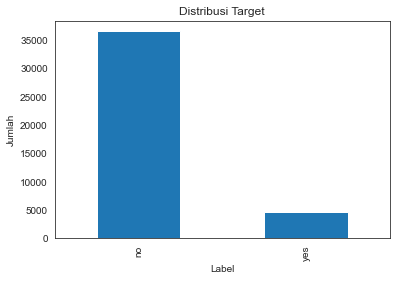

In [10]:
df['y'].value_counts().plot.bar();

plt.title('Distribusi Target');
plt.xlabel('Label');
plt.ylabel('Jumlah');

#### Boxplot Numerical

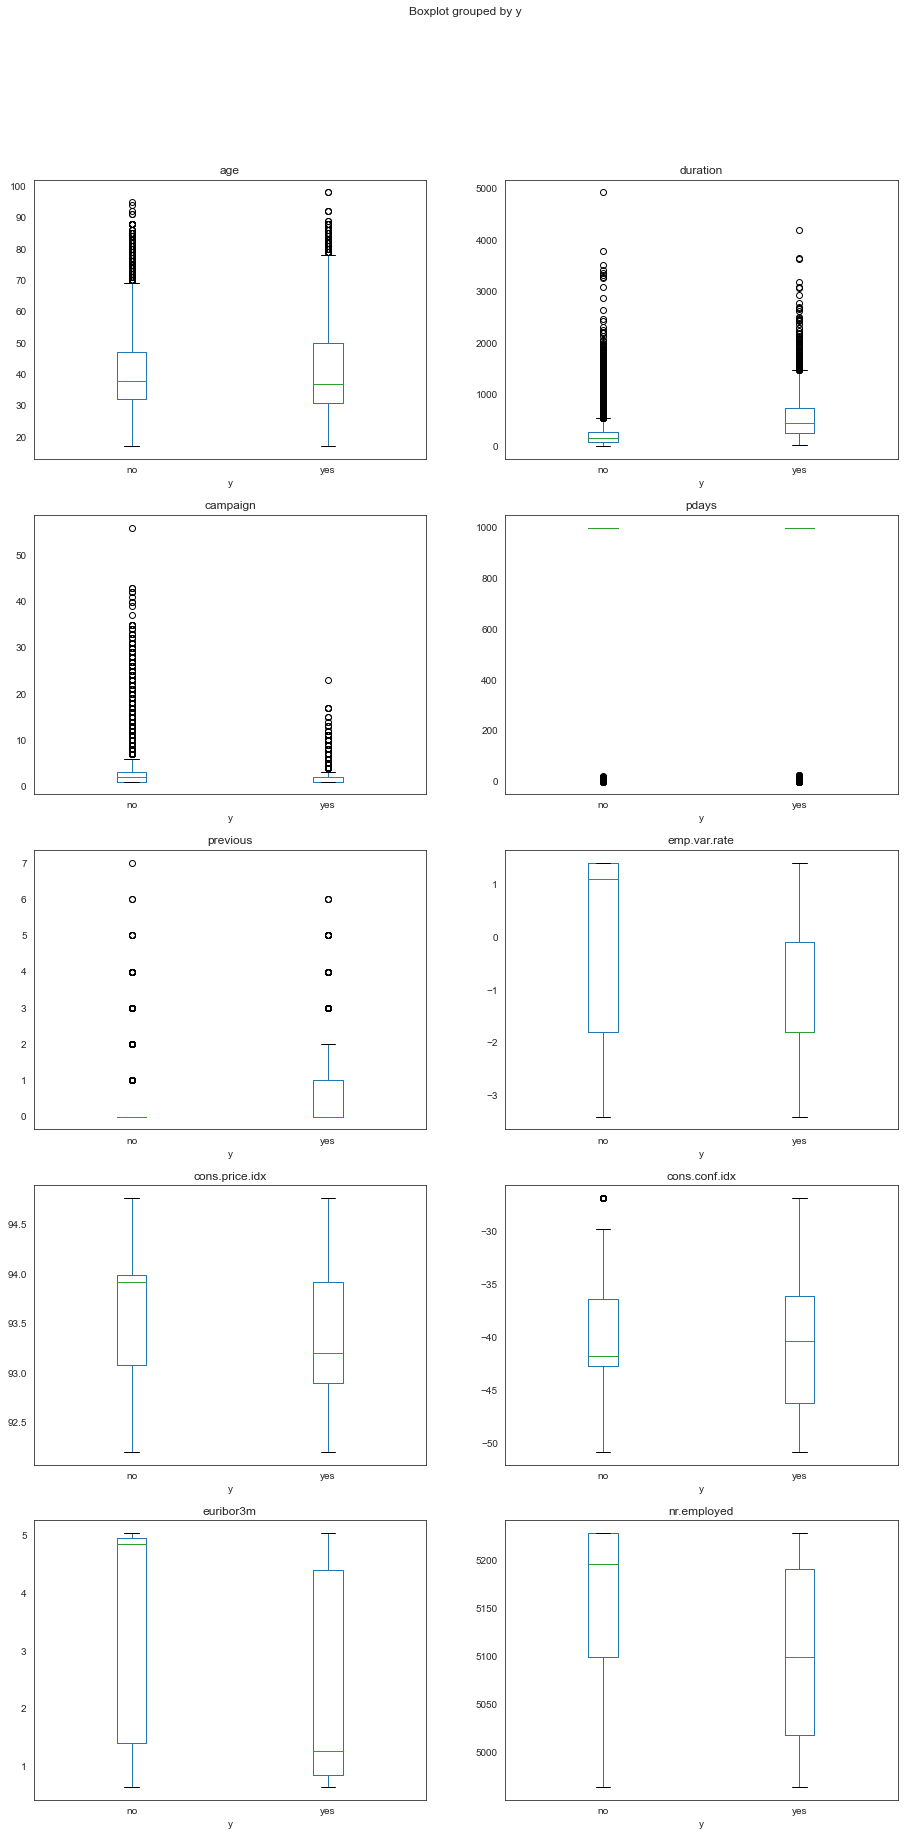

In [11]:
fig, axn = plt.subplots(5, 2, figsize=(15, 30))

for idx, feature in enumerate(numerical_features):
    disp = df.boxplot(by ='y', column =[feature], grid = False, ax=axn[idx//2][idx%2])

plt.show();

#### Matriks Korelasi

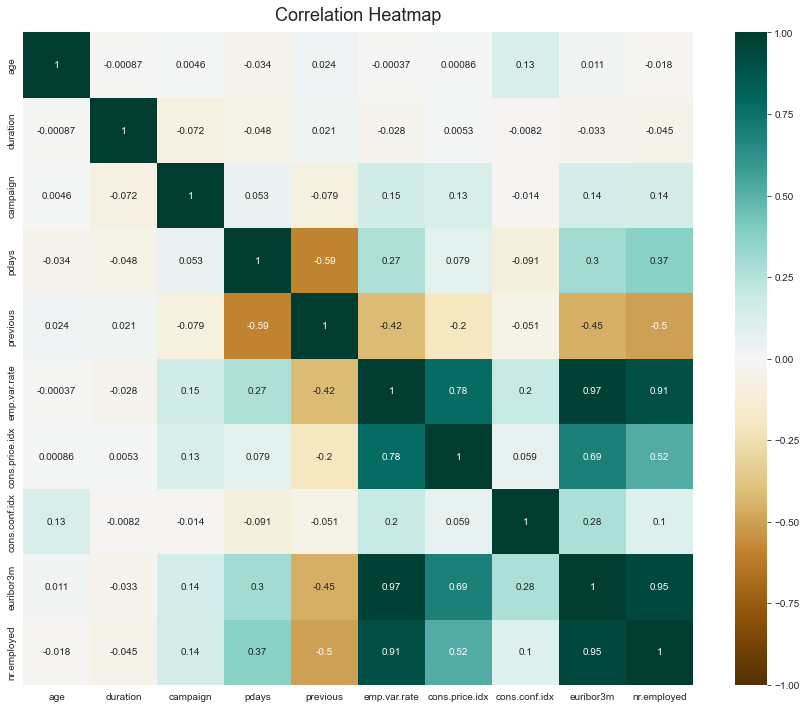

In [12]:
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.show();

#### Scatter Plot Antara Dua Feature Berkorelasi Tinggi

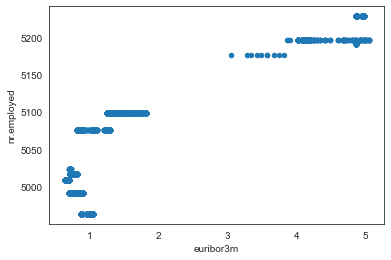

In [13]:
# euribor3m x nr.employed

df.plot.scatter(x='euribor3m', y='nr.employed');

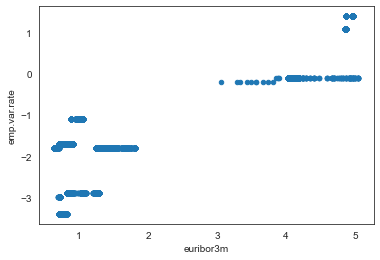

In [14]:
# euribor3m x emp.var.rate

df.plot.scatter(x='euribor3m', y='emp.var.rate');

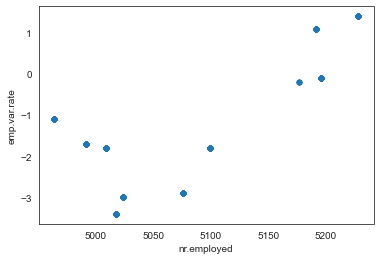

In [15]:
# nr.employed x emp.var.rate

df.plot.scatter(x='nr.employed', y='emp.var.rate');

### Preprocessing

#### Split Data 

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11)
X_train_plain, y_train_plain = X_train, y_train

#### Handling Imbalance Data

In [17]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC

ros = RandomOverSampler(random_state=11)
rus = RandomUnderSampler(random_state=11)
sm = SMOTENC(random_state=11, categorical_features=[df.columns.get_loc(feature) for feature in categorical_features if feature in X])

X_train, y_train = sm.fit_resample(X_train, y_train)

## Eksperimen Model

### Preprocessing Pipeline

In [18]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer([
    ('preprocess_num', MinMaxScaler(), numerical_features),
    ('preprocess_cat', make_pipeline(OrdinalEncoder(), MinMaxScaler()), categorical_features),
])

### Model Tanpa Handling Imbalance

#### Random Forest Classifier

              precision    recall  f1-score   support

          no       0.91      1.00      0.95      3671
         yes       0.83      0.20      0.32       448

    accuracy                           0.91      4119
   macro avg       0.87      0.60      0.64      4119
weighted avg       0.90      0.91      0.88      4119



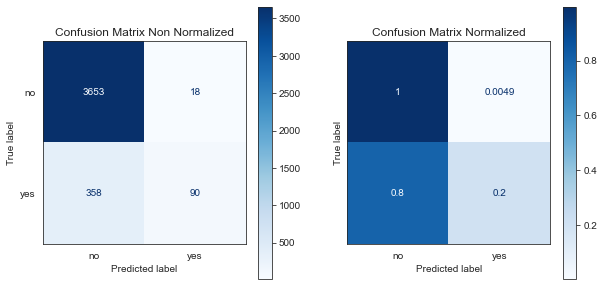

In [19]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(preprocessing, RandomForestClassifier(max_depth=3, random_state=11))
pipeline.fit(X_train_plain, y_train_plain)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

fig, axn = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[0], cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Confusion Matrix Non Normalized")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[1], cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Confusion Matrix Normalized")

plt.show();

### Model Dengan Handling Imbalance

#### Random Forest Classifier

              precision    recall  f1-score   support

          no       0.98      0.85      0.91      3671
         yes       0.41      0.85      0.55       448

    accuracy                           0.85      4119
   macro avg       0.69      0.85      0.73      4119
weighted avg       0.92      0.85      0.87      4119



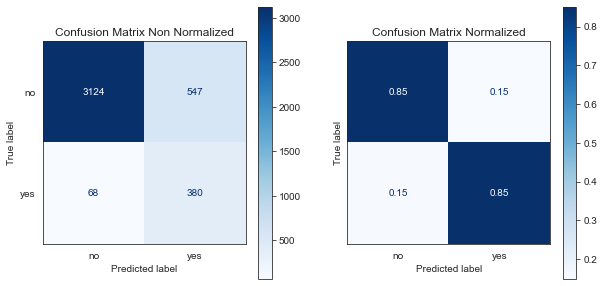

In [20]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(preprocessing, RandomForestClassifier(max_depth=4, random_state=11))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

fig, axn = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[0], cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Confusion Matrix Non Normalized")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[1], cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Confusion Matrix Normalized")

plt.show();

#### Naive Bayes Classifier

              precision    recall  f1-score   support

          no       0.95      0.79      0.87      3671
         yes       0.29      0.69      0.41       448

    accuracy                           0.78      4119
   macro avg       0.62      0.74      0.64      4119
weighted avg       0.88      0.78      0.82      4119



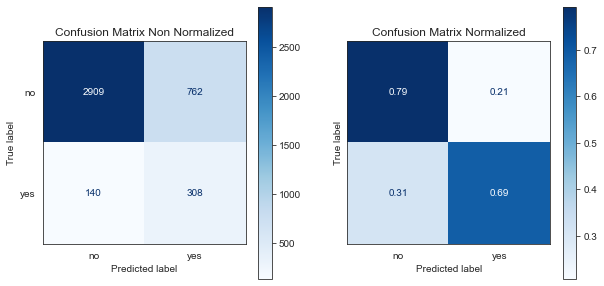

In [21]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

pipeline = make_pipeline(preprocessing, GaussianNB())
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

fig, axn = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[0], cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Confusion Matrix Non Normalized")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[1], cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Confusion Matrix Normalized")

plt.show();

#### Decision Tree Classifier

              precision    recall  f1-score   support

          no       0.98      0.85      0.91      3671
         yes       0.41      0.88      0.56       448

    accuracy                           0.85      4119
   macro avg       0.70      0.86      0.73      4119
weighted avg       0.92      0.85      0.87      4119



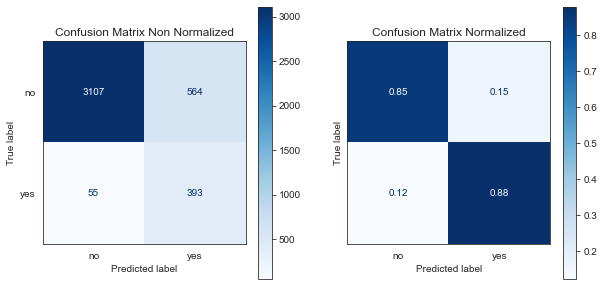

In [22]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(preprocessing, DecisionTreeClassifier(max_depth=3))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

fig, axn = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[0], cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Confusion Matrix Non Normalized")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[1], cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Confusion Matrix Normalized")

plt.show();

#### Neural Network MLP Classifier

              precision    recall  f1-score   support

          no       0.97      0.91      0.94      3671
         yes       0.51      0.74      0.61       448

    accuracy                           0.90      4119
   macro avg       0.74      0.83      0.77      4119
weighted avg       0.92      0.90      0.90      4119



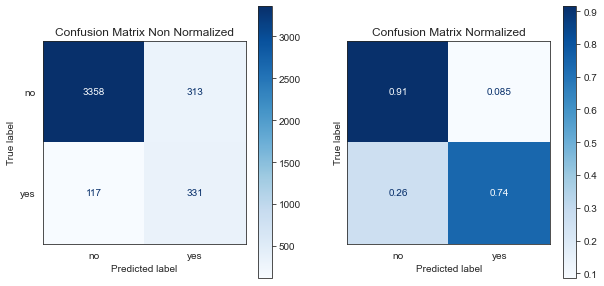

In [23]:
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

pipeline = make_pipeline(preprocessing, MLPClassifier(solver='adam', max_iter=1200, alpha=1e-5, hidden_layer_sizes=(50, 50), random_state=1))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

fig, axn = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[0], cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Confusion Matrix Non Normalized")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[1], cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Confusion Matrix Normalized")

plt.show();

#### kNN Classifier

              precision    recall  f1-score   support

          no       0.95      0.89      0.92      3671
         yes       0.40      0.58      0.47       448

    accuracy                           0.86      4119
   macro avg       0.67      0.74      0.69      4119
weighted avg       0.89      0.86      0.87      4119



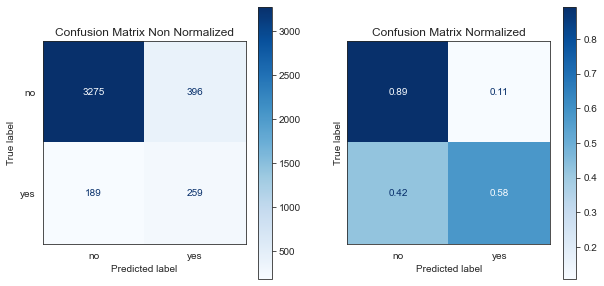

In [24]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

pipeline = make_pipeline(preprocessing, KNeighborsClassifier())
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

fig, axn = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[0], cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Confusion Matrix Non Normalized")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[1], cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Confusion Matrix Normalized")

plt.show();

#### Logistic Regression Classifier

              precision    recall  f1-score   support

          no       0.97      0.88      0.92      3671
         yes       0.45      0.80      0.57       448

    accuracy                           0.87      4119
   macro avg       0.71      0.84      0.75      4119
weighted avg       0.92      0.87      0.89      4119



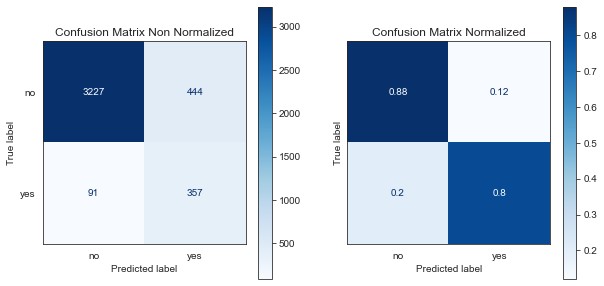

In [25]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

pipeline = make_pipeline(preprocessing, LogisticRegression(solver='lbfgs', max_iter=1000))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

fig, axn = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[0], cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Confusion Matrix Non Normalized")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[1], cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Confusion Matrix Normalized")

plt.show();

#### Linear SVM Classifier

              precision    recall  f1-score   support

          no       0.97      0.87      0.92      3671
         yes       0.44      0.80      0.56       448

    accuracy                           0.87      4119
   macro avg       0.70      0.84      0.74      4119
weighted avg       0.91      0.87      0.88      4119



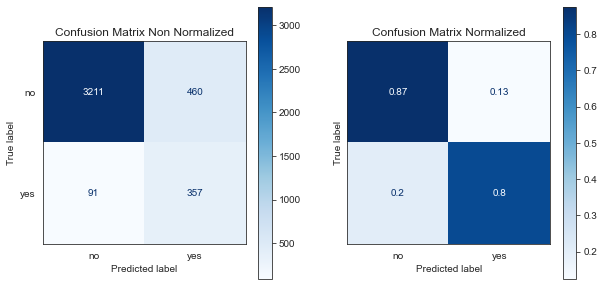

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import LinearSVC

pipeline = make_pipeline(preprocessing, LinearSVC(max_iter=10000))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

fig, axn = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[0], cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Confusion Matrix Non Normalized")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[1], cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Confusion Matrix Normalized")

plt.show();

#### SVM Classifier Kernel Radial Basis Function (RBF)

              precision    recall  f1-score   support

          no       0.97      0.87      0.92      3671
         yes       0.43      0.81      0.56       448

    accuracy                           0.86      4119
   macro avg       0.70      0.84      0.74      4119
weighted avg       0.91      0.86      0.88      4119



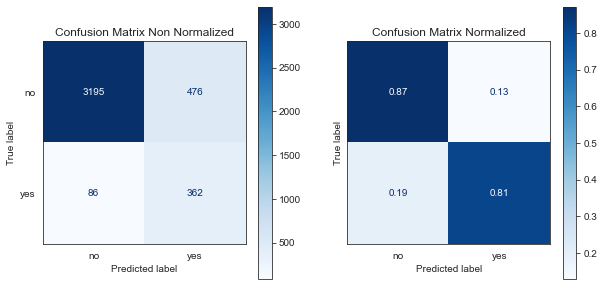

In [27]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

pipeline = make_pipeline(preprocessing, SVC(gamma='auto'))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

fig, axn = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[0], cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Confusion Matrix Non Normalized")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[1], cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Confusion Matrix Normalized")

plt.show();

#### SVM Classifier Kernel Polynomial

              precision    recall  f1-score   support

          no       0.97      0.80      0.88      3671
         yes       0.33      0.79      0.47       448

    accuracy                           0.80      4119
   macro avg       0.65      0.80      0.67      4119
weighted avg       0.90      0.80      0.83      4119



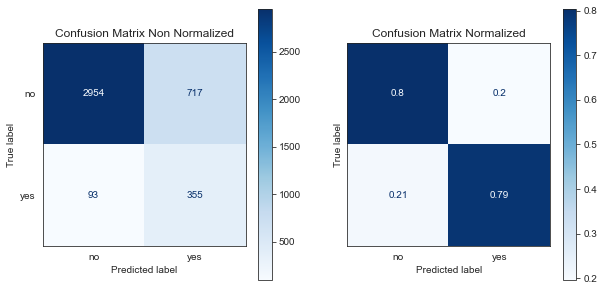

In [28]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

pipeline = make_pipeline(preprocessing, SVC(kernel='poly', gamma='auto'))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

fig, axn = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[0], cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Confusion Matrix Non Normalized")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[1], cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Confusion Matrix Normalized")

plt.show();

#### SVM Classifier Kernel Sigmoid

              precision    recall  f1-score   support

          no       0.96      0.77      0.85      3671
         yes       0.27      0.71      0.39       448

    accuracy                           0.76      4119
   macro avg       0.61      0.74      0.62      4119
weighted avg       0.88      0.76      0.80      4119



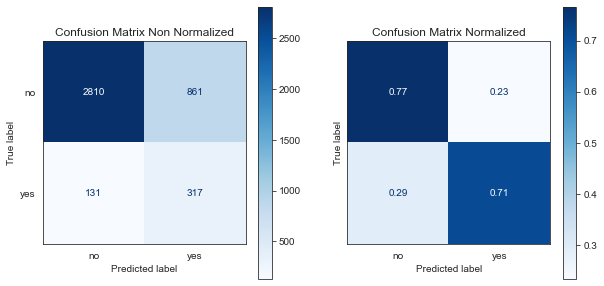

In [29]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

pipeline = make_pipeline(preprocessing, SVC(kernel='sigmoid', gamma='auto'))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

fig, axn = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[0], cmap=plt.cm.Blues, normalize=None)
disp.ax_.set_title("Confusion Matrix Non Normalized")

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[1], cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title("Confusion Matrix Normalized")

plt.show();

## Kesimpulan